# **Week 14 Activity**

### *Unsupervised Machine Learning*

### Our Case study :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing ScikitLearn
import sklearn

In [2]:
# Read student data
cdata=pd.read_csv('Country-data.csv')

### **1. Initial walkthrough through the dataset**

In [4]:
cdata.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350


In [6]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
cdata.describe(include=['object'])

,country
count,167
unique,167
top,Afghanistan
freq,1


In [8]:
cdata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
cdata.isna().sum().to_frame('Null value count')

,Null value count
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


### Early Insights :
* This Dataframe contains the economy details (9 Category) of 167 countries.
* No null values.

### **2. Some Pre-processing activity**

Outlier analysis

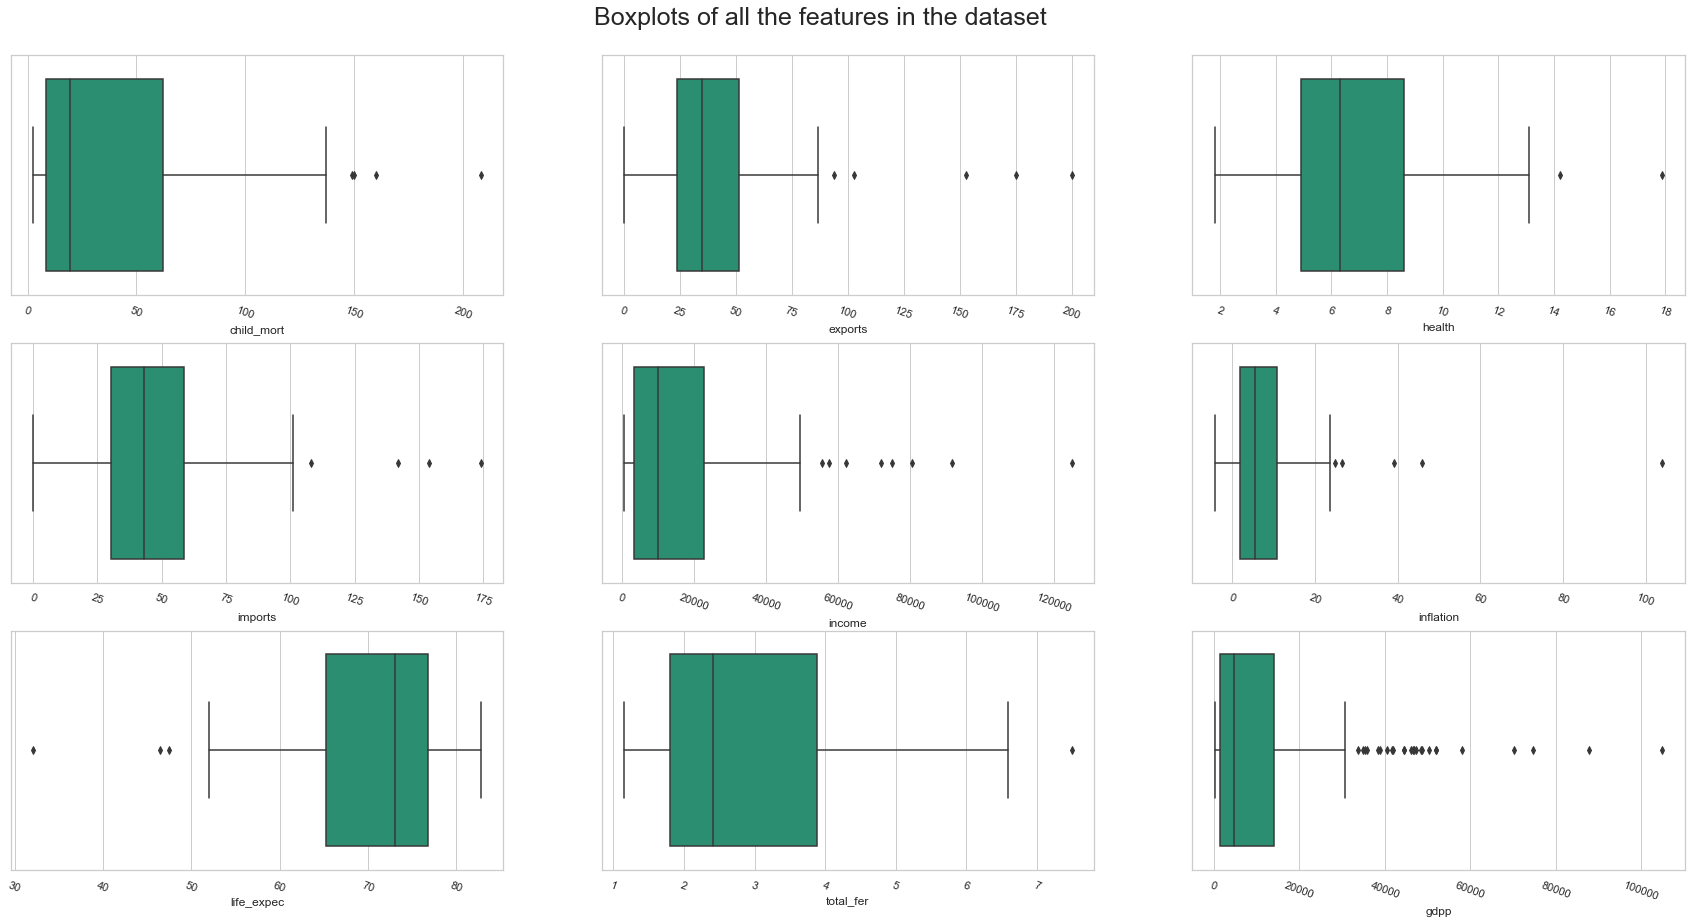

In [65]:
# select the columns to be plotted
cols = cdata.columns.to_list()
cols.remove('country')
# create the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(30, 15))
# Setting the sns plot theme
sns.set_theme(style="whitegrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Boxplots of all the features in the dataset', fontsize=25, y=0.925)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.boxplot(data=cdata[col], x=cdata[col], ax=ax)
    ax.tick_params(axis='x', rotation=340)

plt.show()

Handling Outliers

In [66]:
for i in cols:
  Q1=np.percentile(cdata[i],25,interpolation='midpoint')
  Q2=np.percentile(cdata[i],50,interpolation='midpoint')
  Q3=np.percentile(cdata[i],75,interpolation='midpoint')
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  cdata.loc[cdata[i]<lower_limit, i] = lower_limit
  cdata.loc[cdata[i]>upper_limit, i] = upper_limit

After processing!

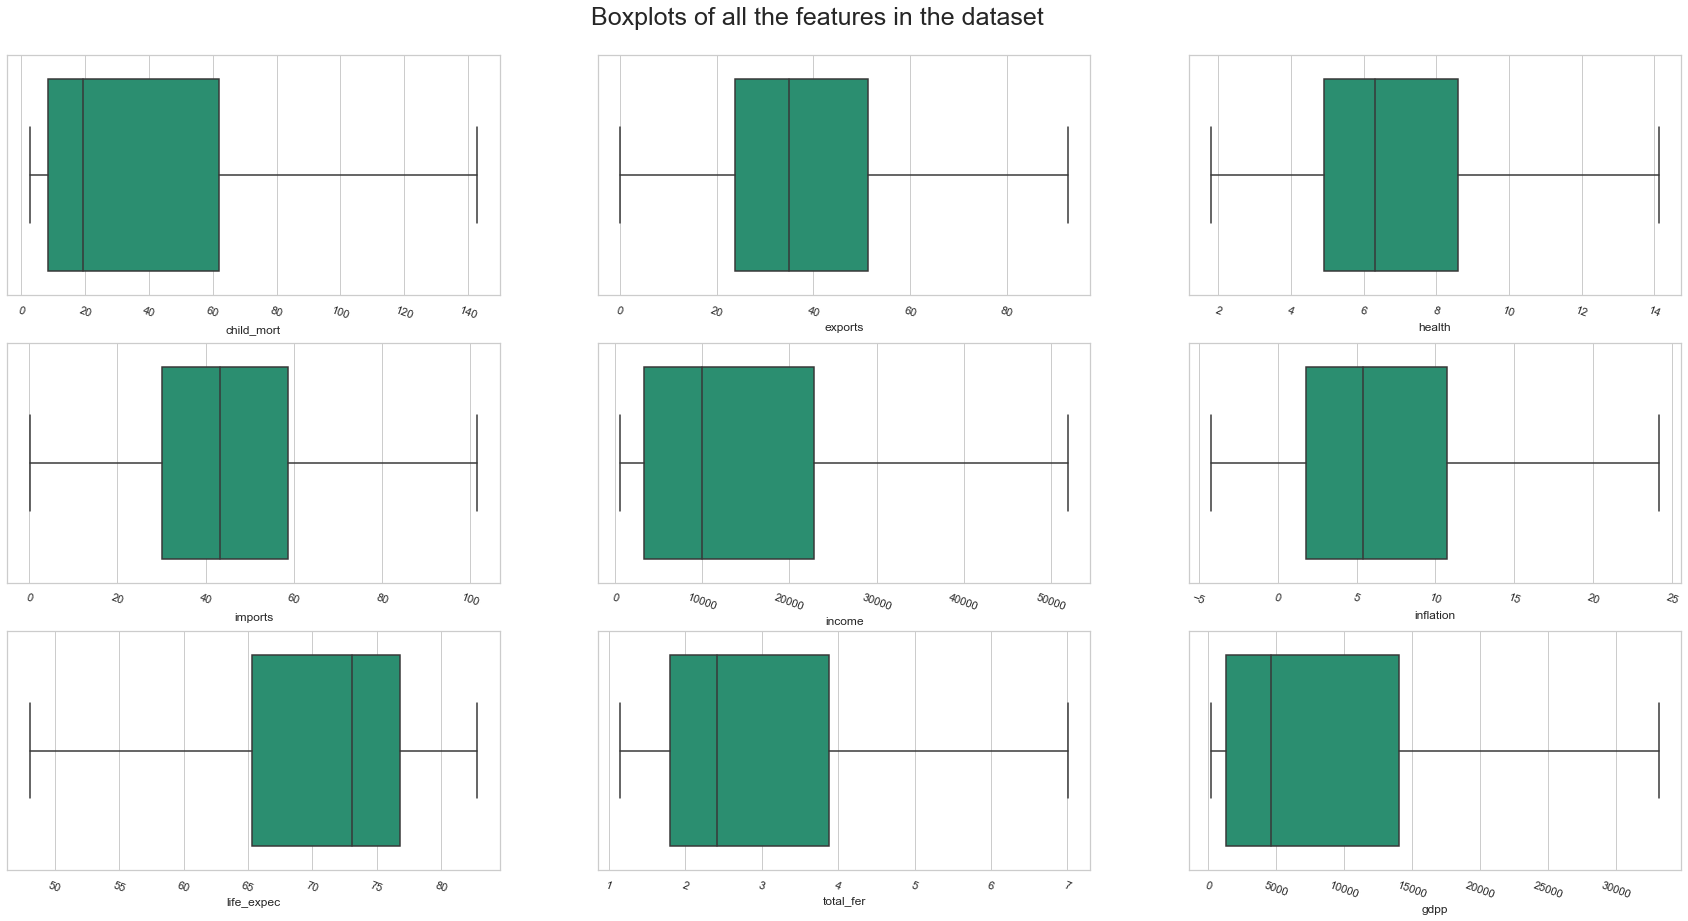

In [67]:
# select the columns to be plotted
cols = cdata.columns.to_list()
cols.remove('country')
# create the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(30, 15))
# Setting the sns plot theme
sns.set_theme(style="whitegrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Boxplots of all the features in the dataset', fontsize=25, y=0.925)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.boxplot(data=cdata[col], x=cdata[col], ax=ax)
    ax.tick_params(axis='x', rotation=340)

plt.show()

In [69]:
cdata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,39.543557,6.792575,45.862071,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,21.301318,2.668103,20.338815,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,92.675000,14.120000,101.575000,51967.500000,24.160000,82.800000,7.007500,33130.000000


### **3. Modeling part**

#### Standard Scaling

In [70]:
cdata_sc=cdata.drop('country', axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cdata_sc = standard_scaler.fit_transform(cdata_sc)

#### Fetching optimal WCSS 

In [159]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(cdata_sc)
  wcss.append(kmeans.inertia_)

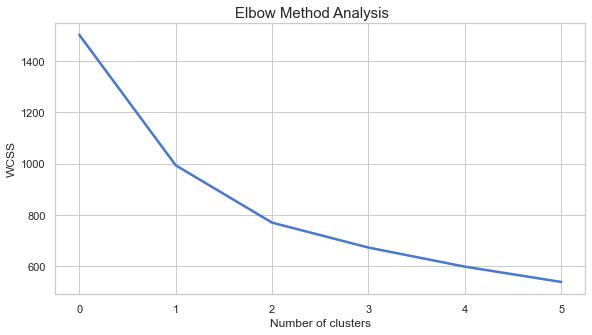

In [160]:
fig, axes = plt.subplots(1, 1, figsize=(9.5, 5))
fig.suptitle('Elbow Method Analysis', fontsize=15, y=0.925)
sns.set_theme(style="whitegrid")
sns.lineplot(data=wcss, palette="tab10", linewidth=2.5, ax=axes)
axes.set(xlabel='Number of clusters', ylabel='WCSS')
plt.show()

The number of optimal clusters as per the Elbow Method is : 2

In [161]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(cdata_sc)
cdata_sc1 = pd.concat([cdata, pd.Series(y_kmeans)], axis = 1)
cdata_sc1.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
cdata_sc1.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
36,Comoros,88.2,16.5,4.51,51.7,1410.0,3.870,65.9,4.75,769,1
16,Belize,18.8,58.2,5.20,57.5,7880.0,1.140,71.4,2.71,4340,0
72,Iraq,36.9,39.4,8.41,34.1,12700.0,16.600,67.2,4.56,4500,1
144,Sweden,3.0,46.2,9.63,40.7,42900.0,0.991,81.5,1.98,33130,0
100,Mauritius,15.0,51.2,6.00,62.2,15900.0,1.130,73.4,1.57,8000,0


<AxesSubplot:xlabel='life_expec', ylabel='child_mort'>

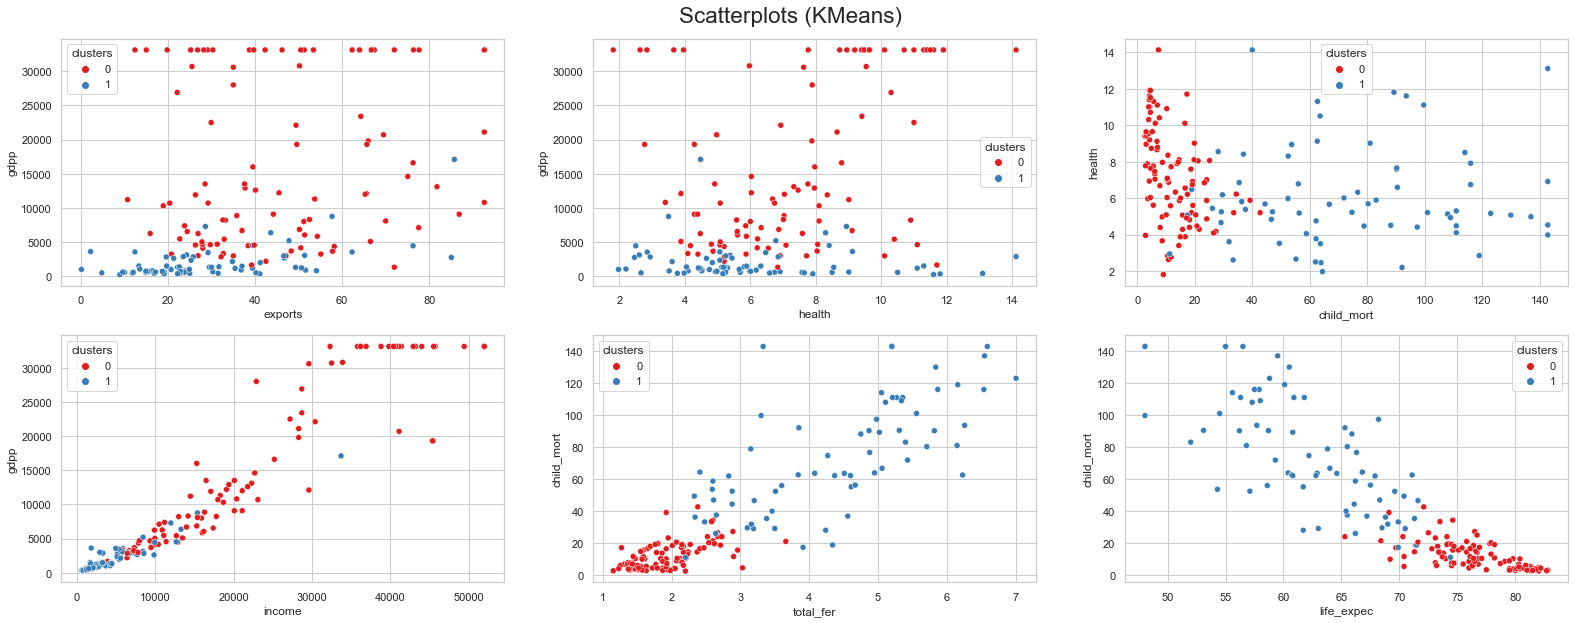

In [162]:
fig, axes = plt.subplots(2, 3, figsize=(27, 10))
fig.suptitle('Scatterplots (KMeans)', fontsize=22.5, y=0.925)
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(ax=axes[0,0], x = 'exports', y = 'gdpp', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')
sns.scatterplot(ax=axes[0,1], x = 'health', y = 'gdpp', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')
sns.scatterplot(ax=axes[0,2], x = 'child_mort', y = 'health', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')
sns.scatterplot(ax=axes[1,0], x = 'income', y = 'gdpp', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')
sns.scatterplot(ax=axes[1,1], x = 'total_fer', y = 'child_mort', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')
sns.scatterplot(ax=axes[1,2], x = 'life_expec', y = 'child_mort', hue ='clusters', legend = 'full', data = cdata_sc1, palette='Set1')


Cluster 1 has very low income & gdpp and very high child mortality rate! So this cluster will be our focus for now on.

In [169]:
pd.set_option('display.max_rows', None)
cdata_sc1[cdata_sc1.clusters == 1].country.to_frame()

,country
0,Afghanistan
3,Angola
12,Bangladesh
17,Benin
19,Bolivia
21,Botswana
25,Burkina Faso
26,Burundi
27,Cambodia
28,Cameroon


Top 10 countries obtained from K-Means Models are

In [132]:
top_kmeans = cdata_sc1[cdata_sc1.clusters==1].sort_values(["child_mort"], ascending=False)
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Chad,142.875,36.8,4.53,43.5,1930.0,6.39,56.50,6.5900,897,1
1,Central African Republic,142.875,11.8,3.98,26.5,888.0,2.01,48.05,5.2100,446,1
2,Sierra Leone,142.875,16.8,13.10,34.5,1220.0,17.20,55.00,5.2000,399,1
3,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,48.05,3.3300,662,1
4,Mali,137.000,22.8,4.98,35.1,1870.0,4.37,59.50,6.5500,708,1
5,Nigeria,130.000,25.3,5.07,17.4,5150.0,24.16,60.50,5.8400,2330,1
6,Niger,123.000,22.2,5.16,49.1,814.0,2.55,58.80,7.0075,348,1
7,Angola,119.000,62.3,2.85,42.9,5900.0,22.40,60.10,6.1600,3530,1
8,Burkina Faso,116.000,19.2,6.74,29.6,1430.0,6.81,57.90,5.8700,575,1
9,"Congo, Dem. Rep.",116.000,41.1,7.91,49.6,609.0,20.80,57.50,6.5400,334,1


### Agglomerative Hierarchical Clustering

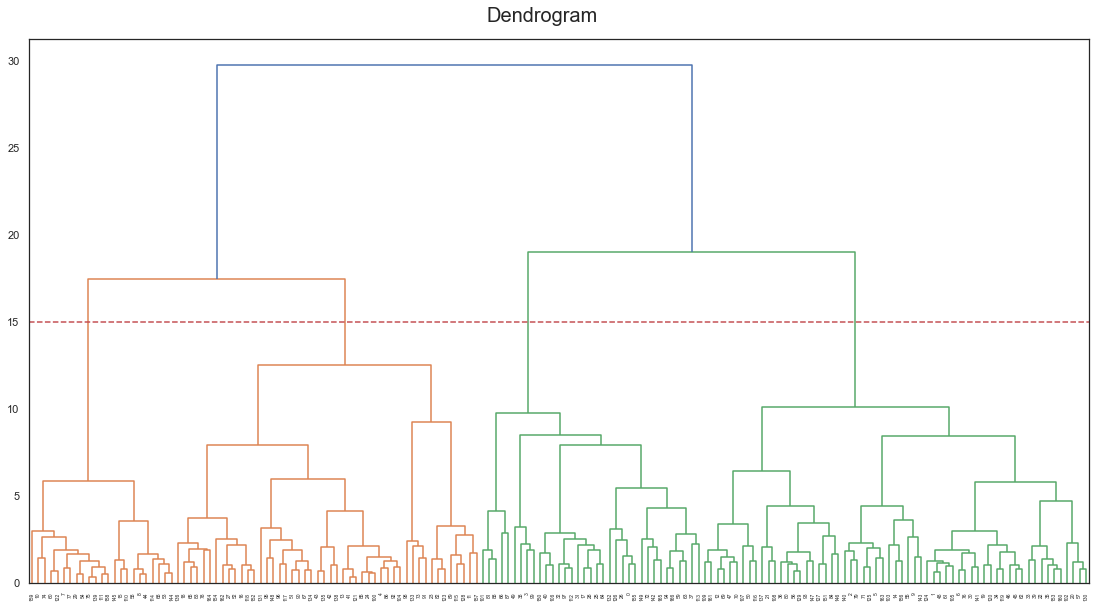

In [154]:
import scipy.cluster.hierarchy as ch
plt.figure(figsize=(19,10))
sns.set_theme(style="white")
plt.suptitle('Dendrogram', fontsize=20, y=0.925)
dendrogram=ch.dendrogram(ch.linkage(cdata_sc,method='ward'))
plt.hlines(15,0,2000, colors="r", linestyles="dashed")
plt.show()

The number of clusters as per the Dendrogram Method is: 4

In [155]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(cdata_sc)
cdata_sc2 = pd.concat([cdata, pd.Series(y_hc)], axis = 1)
cdata_sc2.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusters']
cdata_sc2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


<AxesSubplot:xlabel='health', ylabel='life_expec'>

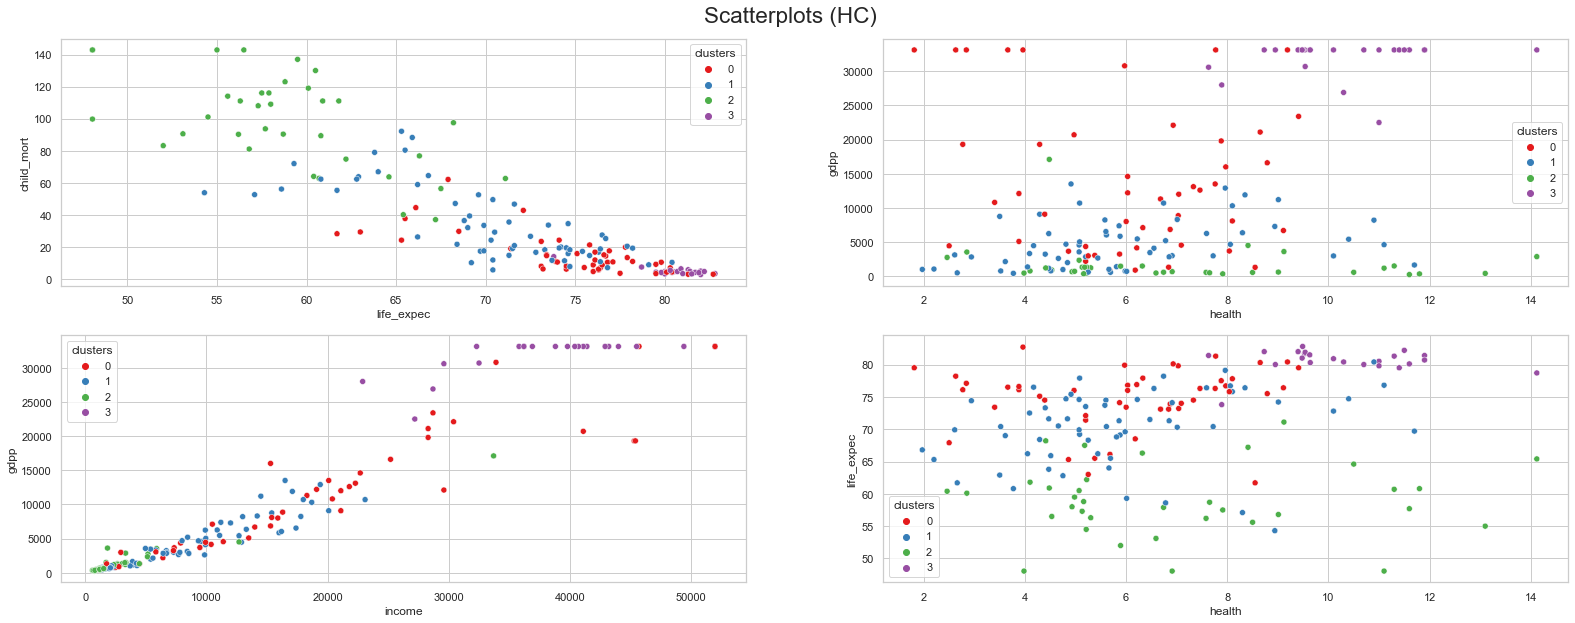

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(27, 10))
fig.suptitle('Scatterplots (HC)', fontsize=22.5, y=0.925)
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(ax=axes[0,0], x = 'life_expec', y = 'child_mort', hue ='clusters', legend = 'full', data = cdata_sc2, palette='Set1')
sns.scatterplot(ax=axes[0,1], x = 'health', y = 'gdpp', hue ='clusters', legend = 'full', data = cdata_sc2, palette='Set1')
sns.scatterplot(ax=axes[1,0], x = 'income', y = 'gdpp', hue ='clusters', legend = 'full', data = cdata_sc2, palette='Set1')
sns.scatterplot(ax=axes[1,1], x = 'health', y = 'life_expec', hue ='clusters', legend = 'full', data = cdata_sc2, palette='Set1')


Cluster 2 has very low income and gdpp and very high child mortality rate.

In [171]:
cdata_sc2[cdata_sc2.clusters == 2].country.to_frame()

,country
0,Afghanistan
3,Angola
17,Benin
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
37,"Congo, Dem. Rep."
38,"Congo, Rep."


Top 10 Countries obtained from Hierarchical Models are:

In [158]:
top_hc = cdata_sc2[cdata_sc2['clusters']==0].sort_values(["child_mort"], ascending=False) 
top_hc = top_hc.reset_index().drop('index',1)
top_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Turkmenistan,62.0,76.3,2.50,44.5,9940.0,2.31,67.9,2.83,4440,0
1,Cambodia,44.4,54.1,5.68,59.5,2520.0,3.12,66.1,2.88,786,0
2,Bhutan,42.7,42.5,5.20,70.7,6420.0,5.99,72.1,2.38,2180,0
3,Guyana,37.6,51.4,5.38,79.1,5840.0,5.73,65.5,2.65,3040,0
4,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790.0,10.00,68.5,3.10,880,0
5,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970,0
6,Solomon Islands,28.1,49.3,8.55,81.2,1780.0,6.81,61.7,4.24,1290,0
7,Fiji,24.1,57.8,4.86,63.9,7350.0,4.23,65.3,2.67,3650,0
8,Paraguay,24.1,55.1,5.87,51.5,7290.0,6.10,74.1,2.73,3230,0
9,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310,0


## Summary

By the help of Unsupervised learning methods such as KMeans & HC, we rectified the significant issues related to choosing the countries that are in the direst need of aid. Eventhough KMeans shown it's strength in some fields, our dataset is most suitable for Agglomerative Hierarchical Clustering method.

**End of the file reached**